In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split

In [27]:
credits = pd.read_csv('/content/creditcard.csv')
credits

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
#общая информация: количество записей, количество непропущенных значений в каждом столбце, типы данных столбцов и использование памяти
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
#проверка наличия пропущенных значений и их количества
credits.isnull().sum().sum()

0

In [30]:
#проверка наличия дубликатов и их количества
credits.duplicated().sum()

1081

In [31]:
#удаление 1080 дубликатов
credits_no_duplicates = credits.drop_duplicates()

#проверка результата
credits_no_duplicates.shape

(283726, 31)

In [32]:
#изменение исходного DataFrame
credits.drop_duplicates(inplace=True)

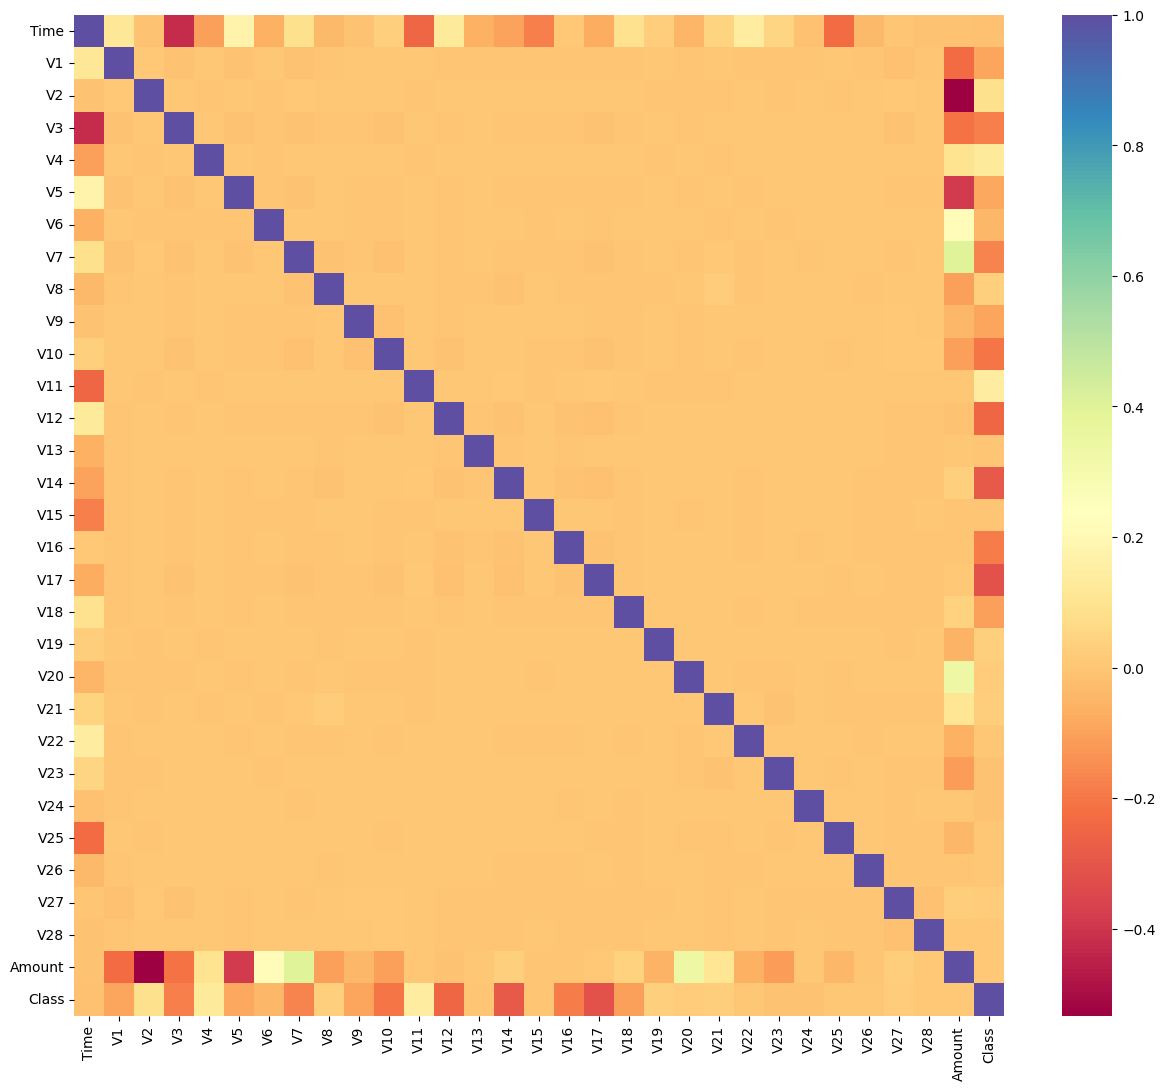

In [33]:
#корреляция сбалансированной выборки
plt.figure(figsize = (15,13))
sns.heatmap(credits.corr(), cmap=('Spectral'));

In [34]:
#признаки V1-V28 никак не коррелируют друг с другом, но видно незначительную корреляцию этих признаков с колонками Time, Amount и с целевой переменной Class

In [35]:
credits['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [36]:
px.pie(values = credits['Class'].value_counts(), names = ['Честный перевод','Мошенничество'])

In [37]:
#данные не сбалансированы. Мошеннических транзакций 0.167 % от всех

In [38]:
print('Честный перевод: ', round(credits['Class'].value_counts()[0]/len(credits['Class'])*100,2))
print('Мошенничество: ', round(credits['Class'].value_counts()[1]/len(credits['Class'])*100,2))

Честный перевод:  99.83
Мошенничество:  0.17


In [39]:
credits.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [40]:
#присутствуют выбросы по каждому из столбцов


# Разделение выборки на тренинговую и тестовую

In [41]:
#разделение на train и test
credits.loc[(credits['Class'] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [58]:
X = credits.iloc[:, :-1]
y = credits.Class

In [59]:
#разделение данных на обучающую и тестовую выборки в соотношении 80 % и 20 %
X_train, X_test, y_train, y_test = train_test_split(credits.drop('Class', axis=1), credits['Class'], test_size=0.2)

In [60]:
#значения в y_train и y_test
print('y_train:', y_train.unique(), '\n', 'y_test:', y_test.unique())

y_train: [0 1] 
 y_test: [0 1]


In [61]:
#статистики генеральной выборки
credits.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [62]:
#cтатистики обучающей выборки
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,94778.489867,0.006545,-0.005161,0.000873,-0.002608,0.000649,0.000827,0.002168,-0.001596,-0.002378,...,0.000259,0.001143,-0.001164,-0.000174,-0.000291,0.000361,-0.000347,0.002147,0.000485,88.885059
std,47480.679590,1.949568,1.652017,1.510596,1.414352,1.385427,1.334939,1.238605,1.173596,1.096240,...,0.776834,0.728779,0.725962,0.626247,0.606308,0.521766,0.481359,0.395611,0.335667,257.015207
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-50.943369,-13.434066,...,-54.497720,-22.889347,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,54145.000000,-0.915596,-0.600148,-0.888515,-0.849969,-0.690732,-0.768566,-0.552497,-0.208845,-0.646079,...,-0.211341,-0.228509,-0.544468,-0.162025,-0.354875,-0.317084,-0.326676,-0.070680,-0.052807,5.550000
50%,84633.000000,0.023431,0.064096,0.180556,-0.020959,-0.052649,-0.273606,0.040410,0.021898,-0.052616,...,-0.062375,-0.029427,0.006638,-0.011038,0.040398,0.017078,-0.052535,0.001484,0.011215,22.000000
75%,139245.000000,1.315853,0.798767,1.025565,0.741929,0.612043,0.400479,0.569714,0.325531,0.594983,...,0.132441,0.186120,0.527578,0.147252,0.439260,0.351870,0.238970,0.091288,0.077856,77.630000
max,172792.000000,2.446505,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,19.587773,10.392889,...,39.420904,27.202839,8.361985,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [63]:
#статистики тестовой выборки
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,94941.426233,0.003404,-0.000028,0.004574,-0.004398,0.006541,-0.009006,0.000332,0.002113,0.001532,...,-0.000102,-0.006425,0.004581,0.001686,0.002236,-0.002607,0.002135,0.000228,0.000797,86.823228
std,47482.715769,1.941861,1.625282,1.501011,1.413523,1.342807,1.319812,1.182900,1.200644,1.092502,...,0.741962,0.704070,0.718864,0.613422,0.602893,0.519031,0.484816,0.396276,0.295500,221.968210
min,7.000000,-46.855047,-47.429676,-31.103685,-5.266509,-25.791132,-23.496714,-31.764946,-73.216718,-8.739670,...,-23.420173,-34.830382,-5.788277,-27.533643,-2.822384,-4.781606,-2.068561,-22.565679,-11.710896,0.000000
25%,54361.500000,-0.917947,-0.601243,-0.892817,-0.850752,-0.685772,-0.771120,-0.552535,-0.208757,-0.637259,...,-0.211866,-0.227651,-0.535339,-0.160323,-0.353113,-0.319375,-0.327180,-0.070449,-0.052881,5.762500
50%,84939.500000,0.007429,0.063365,0.178347,-0.027723,-0.056945,-0.280806,0.042389,0.021901,-0.051805,...,-0.062247,-0.029613,0.007249,-0.011560,0.043662,0.012607,-0.050721,0.001467,0.011603,22.275000
75%,139492.000000,1.316737,0.806342,1.032265,0.731085,0.612997,0.381418,0.574338,0.326362,0.599814,...,0.136303,0.186600,0.530901,0.149614,0.441440,0.346075,0.245321,0.090950,0.079991,77.000000
max,172786.000000,2.454930,16.713389,9.382558,13.129143,34.099309,16.614054,25.235195,20.007208,15.594995,...,16.756448,20.063786,10.503090,22.083545,4.022866,6.070850,3.220178,10.135597,15.632689,5707.820000


In [64]:
y_test.describe()

count    56746.000000
mean         0.001621
std          0.040233
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

In [65]:
y_train.describe()

count    226980.000000
mean          0.001679
std           0.040936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [67]:
#Логическая регрессия без ресемплинга
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_train, y_train)
y_pred_lr_clear = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_clear = accuracy_score(y_test,y_pred_lr_clear)*100
recall_LR_clear = recall_score(y_test, y_pred_lr_clear, average = 'binary')*100
precision_LR_clear = precision_score(y_test, y_pred_lr_clear)*100
f1_LR_clear = f1_score(y_test, y_pred_lr_clear)*100

In [68]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_train,y_train)
y_pred_rf_clear = classifier_RF.predict(X_test)
# метрики для RF_clear
accuracy_rf_clear = accuracy_score(y_test,y_pred_rf_clear)*100
recall_rf_clear = recall_score(y_test, y_pred_rf_clear, average = 'binary')*100
precision_rf_clear = precision_score(y_test, y_pred_rf_clear)*100
f1_rf_clear = f1_score(y_test, y_pred_rf_clear)*100

In [69]:
LR_clear = pd.DataFrame({'LR_clear':[accuracy_LR_clear,recall_LR_clear,precision_LR_clear,f1_LR_clear]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_clear = pd.DataFrame({'RF_clear':[accuracy_rf_clear,recall_rf_clear,precision_rf_clear,f1_rf_clear]},index = ['Accuracy','Recall','Precision','F1-score'])
#KNN_clear = pd.DataFrame([accuracy_KNN_clear,recall_KNN_clear,precision_KNN_clear,f1_KNN_clear])

df = pd.DataFrame()
df = pd.concat([LR_clear, rf_clear],axis = 1,)
df

,LR_clear,RF_clear
Accuracy,99.918937,99.950657
Recall,63.043478,76.086957
Precision,82.857143,92.105263
F1-score,71.604938,83.333333


# Рандомный Оверресемплинг

In [70]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 226599 / 50.0 % of the dataset
Frauds: 226599 / 50.0 % of the dataset


In [71]:
#Логическая регрессия c оверресемплингом
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_over, y_over)
y_pred_lr_over = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_over = accuracy_score(y_test,y_pred_lr_over)*100
recall_LR_over = recall_score(y_test, y_pred_lr_over, average = 'binary')*100
precision_LR_over = precision_score(y_test, y_pred_lr_over)*100
f1_LR_over = f1_score(y_test, y_pred_lr_over)*100


In [72]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_over,y_over)
y_pred_rf_over = classifier_RF.predict(X_test)
#метрики для RF_clear
accuracy_rf_over = accuracy_score(y_test,y_pred_rf_over)*100
recall_rf_over = recall_score(y_test, y_pred_rf_over, average = 'binary')*100
precision_rf_over = precision_score(y_test, y_pred_rf_over)*100
f1_rf_over = f1_score(y_test, y_pred_rf_over)*100

In [73]:
LR_over = pd.DataFrame({'LR_random_over':[accuracy_LR_over,recall_LR_over,precision_LR_over,f1_LR_over]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_over = pd.DataFrame({'RF_random_over':[accuracy_rf_over,recall_rf_over,precision_rf_over,f1_rf_over]},index = ['Accuracy','Recall','Precision','F1-score'])
df = pd.concat([df, LR_over, rf_over],axis = 1)
df

,LR_clear,RF_clear,LR_random_over,RF_random_over
Accuracy,99.918937,99.950657,96.413844,99.950657
Recall,63.043478,76.086957,90.217391,76.086957
Precision,82.857143,92.105263,3.935514,92.105263
F1-score,71.604938,83.333333,7.542026,83.333333


# Рандомный андерсемплинг

In [74]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 381 / 50.0 % of the dataset
Frauds: 381 / 50.0 % of the dataset


In [75]:
#Логическая регрессия c недоресемплингом
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_under, y_under)
y_pred_lr_under = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_under = accuracy_score(y_test,y_pred_lr_under)*100
recall_LR_under = recall_score(y_test, y_pred_lr_under, average = 'binary')*100
precision_LR_under = precision_score(y_test, y_pred_lr_under)*100
f1_LR_under = f1_score(y_test, y_pred_lr_under)*100


In [76]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_under,y_under)
y_pred_rf_under = classifier_RF.predict(X_test)
# метрики для RF_clear
accuracy_rf_under = accuracy_score(y_test,y_pred_rf_under)*100
recall_rf_under = recall_score(y_test, y_pred_rf_under, average = 'binary')*100
precision_rf_under = precision_score(y_test, y_pred_rf_under)*100
f1_rf_under = f1_score(y_test, y_pred_rf_under)*100

In [77]:
LR_under = pd.DataFrame({'LR_random_under':[accuracy_LR_under,recall_LR_under,precision_LR_under,f1_LR_under]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_under = pd.DataFrame({'RF_random_under':[accuracy_rf_under,recall_rf_under,precision_rf_under,f1_rf_under]},index = ['Accuracy','Recall','Precision','F1-score'])
df = pd.concat([df, LR_under, rf_under],axis = 1)
df

,LR_clear,RF_clear,LR_random_over,RF_random_over,LR_random_under,RF_random_under
Accuracy,99.918937,99.950657,96.413844,99.950657,95.199662,97.020054
Recall,63.043478,76.086957,90.217391,76.086957,91.304348,93.478261
Precision,82.857143,92.105263,3.935514,92.105263,3.000000,4.856014
F1-score,71.604938,83.333333,7.542026,83.333333,5.809129,9.232421


# SMOTE Оверресемплинг

In [78]:
from imblearn.over_sampling import SMOTE

Sm = SMOTE(random_state=42)
# fit and apply the transform
X_sm_over, y_sm_over = Sm.fit_resample(X_train, y_train)


In [79]:
#Логическая регрессия c недоресемплингом
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_sm_over, y_sm_over)
y_pred_lr_sm_over = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_sm_over = accuracy_score(y_test,y_pred_lr_sm_over)*100
recall_LR_sm_over = recall_score(y_test, y_pred_lr_sm_over, average = 'binary')*100
precision_LR_sm_over = precision_score(y_test, y_pred_lr_sm_over)*100
f1_LR_sm_over = f1_score(y_test, y_pred_lr_sm_over)*100

In [80]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_sm_over,y_sm_over)
y_pred_rf_sm_over = classifier_RF.predict(X_test)
# метрики для RF_clear
accuracy_rf_sm_over = accuracy_score(y_test,y_pred_rf_sm_over)*100
recall_rf_sm_over = recall_score(y_test, y_pred_rf_sm_over, average = 'binary')*100
precision_rf_sm_over = precision_score(y_test, y_pred_rf_sm_over)*100
f1_rf_sm_over = f1_score(y_test, y_pred_rf_sm_over)*100

In [81]:
LR_sm_over = pd.DataFrame({'LR_SMOTE_over':[accuracy_LR_sm_over,recall_LR_sm_over,precision_LR_sm_over,f1_LR_sm_over]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_sm_over = pd.DataFrame({'RF_SMOTE_over':[accuracy_rf_sm_over,recall_rf_sm_over,precision_rf_sm_over,f1_rf_sm_over]},index = ['Accuracy','Recall','Precision','F1-score'])
df = pd.concat([df, LR_sm_over, rf_sm_over],axis = 1)
df

,LR_clear,RF_clear,LR_random_over,RF_random_over,LR_random_under,RF_random_under,LR_SMOTE_over,RF_SMOTE_over
Accuracy,99.918937,99.950657,96.413844,99.950657,95.199662,97.020054,98.456279,99.947133
Recall,63.043478,76.086957,90.217391,76.086957,91.304348,93.478261,89.130435,81.521739
Precision,82.857143,92.105263,3.935514,92.105263,3.000000,4.856014,8.649789,85.227273
F1-score,71.604938,83.333333,7.542026,83.333333,5.809129,9.232421,15.769231,83.333333


# ВЫВОД
По данным из итоговой таблицы мы получаем 3 наиболее эффективных метода. Это случайный лес с рандомным оверсемплингом, где точность состовляет 95%, а полнота составляет 71%. Случайный лес с полнотой 71% и точностью 94% и случайный лес с учетом  SMOTE оверсемплинга - полнота 74%, точность 88%.

Наиболее лучшим решением будет взять 3 метод, так как он охватывает больший объем данных о мошеннических действиях


In [90]:
#запустить обученную на сэмплинге модель на исходной выборке
y_pred_rf_sm_over = classifier_RF.predict(X)

accuracy_rf_sm_over = accuracy_score(y,y_pred_rf_sm_over)*100
recall_rf_sm_over = recall_score(y, y_pred_rf_sm_over, average = 'binary')*100
precision_rf_sm_over = precision_score(y, y_pred_rf_sm_over)*100
f1_rf_sm_over = f1_score(y, y_pred_rf_sm_over)*100

print(f'precision: {precision_rf_sm_over}, recall: {recall_rf_sm_over}, f1: {f1_rf_sm_over}')


precision: 96.61016949152543, recall: 96.40591966173362, f1: 96.5079365079365


In [92]:
y_pred_rf_over = classifier_RF.predict(X)

accuracy_rf_over = accuracy_score(y,y_pred_rf_over)*100
recall_rf_over = recall_score(y, y_pred_rf_over, average = 'binary')*100
precision_rf_over = precision_score(y, y_pred_rf_over)*100
f1_rf_over = f1_score(y, y_pred_rf_over)*100

print(f'precision: {precision_rf_over}, recall: {recall_rf_over}, f1: {f1_rf_over}')

precision: 96.61016949152543, recall: 96.40591966173362, f1: 96.5079365079365


In [93]:
y_pred_rf_under = classifier_RF.predict(X)

accuracy_rf_under = accuracy_score(y,y_pred_rf_under)*100
recall_rf_under = recall_score(y, y_pred_rf_under, average = 'binary')*100
precision_rf_under = precision_score(y, y_pred_rf_under)*100
f1_rf_under = f1_score(y, y_pred_rf_under)*100

print(f'precision: {precision_rf_under}, recall: {recall_rf_under}, f1: {f1_rf_under}')

precision: 96.61016949152543, recall: 96.40591966173362, f1: 96.5079365079365


Результаты оказались лучше, но это нам показывает только то, что модель переобучилась, потому что данные из тренировочной выборки есть в исходной